<a href="https://colab.research.google.com/github/ShaikHarina/bda1/blob/main/bda%20da2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom
!pip install kaggle


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=84a8671b2c1a2ddd597dbac222fb782b0c55a0c01c48be794bd1e50578e06e3b
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaikharina","key":"7d75561a3ad7b91914d6e4ddd49b47c4"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 20.4MB/s]


In [5]:
!unzip pima-indians-diabetes-database.zip


Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom


In [7]:
df = pd.read_csv('diabetes.csv')
df.head()  # Preview the first few rows of the dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Check for missing values
print(df.isnull().sum())

# Normalize the features (excluding the target column 'Outcome')
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Outcome']))  # Features (all except 'Outcome')
y = df['Outcome'].values  # Target variable (1 = diabetes, 0 = no diabetes)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# SOM grid size and other parameters
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(X)

# Train the SOM on the dataset for a specified number of iterations
som.train_random(X, num_iteration=100)  # You can adjust the number of iterations


In [10]:
plt.figure(figsize=(10, 10))
for i, x in enumerate(X):
    w = som.winner(x)  # Get the winning neuron for each data point
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]),
             color='red' if y[i] == 1 else 'blue',
             fontdict={'size': 12, 'weight': 'bold'})
plt.title('SOM Clustering (Red = Diabetes, Blue = No Diabetes)')
plt.show()


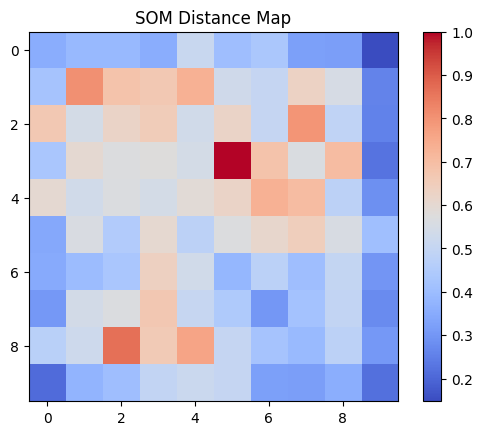

In [11]:
distance_map = som.distance_map().T  # Transposed distance map
plt.imshow(distance_map, cmap='coolwarm')
plt.title('SOM Distance Map')
plt.colorbar()
plt.show()


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Get the SOM neuron mappings as new features
mapped_features = np.array([som.winner(x) for x in X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mapped_features, y, test_size=0.2, random_state=42)

# Train a simple neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 64.29%
Confusion Matrix:
[[99  0]
 [55  0]]
